In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import seaborn as sns

# Load data 

In [27]:
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

In [14]:
print("Shape of the train : ", application_train.shape)
print("Shape of the test : ", application_test.shape)

Shape of the train :  (307511, 122)
Shape of the test :  (48744, 121)


# Exploring data

In [28]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<AxesSubplot:ylabel='Frequency'>

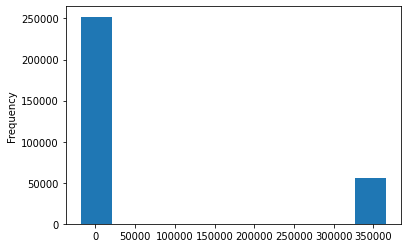

In [16]:
application_train['DAYS_EMPLOYED'].plot.hist()

In [17]:
application_train['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace = True)

In [18]:
application_train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

### Distribution of target  

<AxesSubplot:xlabel='TARGET', ylabel='count'>

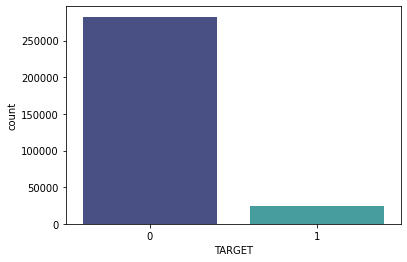

In [19]:
sns.countplot(data=application_train, x='TARGET', palette='mako')

### Distribution of missing values

In [25]:
df_missing_values  = pd.DataFrame(round((application_train.isnull().sum().sort_values(ascending=False)/application_train.shape[0])*100,1)).reset_index()
df_missing_values .columns = ['Columns', '% of Missing Data']
df_missing_values .style.format({'% of Missing Data': lambda x:'{:.1%}'.format(abs(x))})
cm = sns.light_palette("red", as_cmap=True)
df_missing_values.style.background_gradient(cmap=cm)


,Columns,% of Missing Data
0,COMMONAREA_MODE,69.900000
1,COMMONAREA_AVG,69.900000
2,COMMONAREA_MEDI,69.900000
3,NONLIVINGAPARTMENTS_MEDI,69.400000
4,NONLIVINGAPARTMENTS_AVG,69.400000
5,NONLIVINGAPARTMENTS_MODE,69.400000
6,LIVINGAPARTMENTS_AVG,68.400000
7,LIVINGAPARTMENTS_MEDI,68.400000
8,LIVINGAPARTMENTS_MODE,68.400000
9,FLOORSMIN_MEDI,67.800000


### Type of columns

In [21]:
application_train.dtypes.value_counts()

float64    66
int64      40
object     16
dtype: int64

### Deleting columns where data is missing for qualitative variable

In [26]:
df_object_missing_values  = pd.DataFrame(round((application_train.select_dtypes('object').isnull().sum().sort_values(ascending=False)/application_train.select_dtypes('object').shape[0])*100,1)).reset_index()
df_object_missing_values.columns = ['Columns', '% of Missing Data']
df_object_missing_values.style.format({'% of Missing Data': lambda x:'{:.1%}'.format(abs(x))})
cm = sns.light_palette("red", as_cmap=True)
df_object_missing_values.style.background_gradient(cmap=cm)

,Columns,% of Missing Data
0,ORGANIZATION_TYPE,0.000000
1,WEEKDAY_APPR_PROCESS_START,0.000000
2,NAME_HOUSING_TYPE,0.000000
3,NAME_FAMILY_STATUS,0.000000
4,NAME_EDUCATION_TYPE,0.000000
5,NAME_INCOME_TYPE,0.000000
6,FLAG_OWN_REALTY,0.000000
7,FLAG_OWN_CAR,0.000000
8,CODE_GENDER,0.000000
9,NAME_CONTRACT_TYPE,0.000000


In [23]:
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [24]:
application_train.drop(columns=['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE',
                               'OCCUPATION_TYPE','NAME_TYPE_SUITE'],inplace=True)
print('Shape of the train :', application_train.shape)

Shape of the train : (307511, 116)


In [46]:
application_train.to_csv('application_clean_train.csv')